# Under- and overfitting, model selection

## Preliminaries

In the first set of exercises you had to implement the training and evaluation of the linear regression and $k$-NN methods from scratch in order to practice your `numpy` skills. From this set of exercises onward, you can use the implementations provided in `scikit-learn` or other higher-level libraries. We start this set of exercises by demonstrating some of the features of `scikit-learn`.

For example, implementation of linear regression model fitting with an analytical solution for the parameters is provided by the class `sklearn.linar_model.LinearRegression`. You can train a linear regression model in the following way:

In [1]:
import numpy as np
from sklearn import datasets, linear_model

# load the diabetes dataset
diabetes = datasets.load_diabetes()

# use only one feature
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# create linear regression object
model = linear_model.LinearRegression()

# train the model using the training dataset
model.fit(X_train, y_train)

LinearRegression()

Let's visualize the training dataset and the learned regression model.

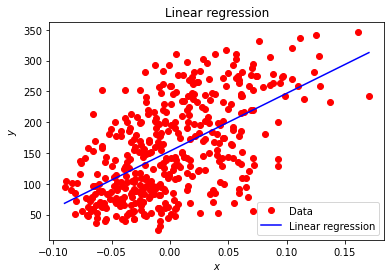

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(X_train, y_train, 'r.', markersize=12)
X_edge = np.array([np.min(X_train, 0), np.max(X_train, 0)])
plt.plot(X_edge, model.predict(X_edge), 'b-')
plt.legend(('Data', 'Linear regression'), loc='lower right')
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

Once trained, the model can be used to make predictions on the test data:

In [3]:
# Make predictions using the testing dataset
prediction = model.predict(X_test)

The next step (not shown here) is to evaluate the performance of the trained model.

Note that the `scikit-learn` interface works by first initializing an object from the class that implements the machine learning model (linear regression in this case) and then fitting the initialized model using the data in the training set. Finally, the trained (fitted) model can be used to make predictions on unseen data. In fact, all models implemented in this library follow the same *initialize-fit-predict* programming interface. For example, a $k$-NN classifier can be trained in the following way:

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors

breast_cancer = datasets.load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

# make use of the train_test_split() utility function instead
# of manually dividing the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=40)
# initialize a 3-NN classifier
model = neighbors.KNeighborsClassifier(n_neighbors=3)

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)

Note that the features in the breast cancer dataset have different scales (some have on average very small absolute values, and some very large), which means that the distance metric used by $k$-NN will me dominated by the features with large values. You can use any of the number of feature transformation methods implemented in `scikit-learn` to scale the features. For example, you can use the `sklearn.preprocessing.StandardScaler` method to transform all features to a have a zero mean and unit variance:

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

The scaler has its own parameters which are the means and standard deviations of the features estimated from the training set. If you train a model with the scaled features, you will have to remember to also apply the scaling transformation every time you make a prediction on new unseen and unscaled data. This is somewhat prone to error. One option for making the code more robust is to create a processing pipeline that includes the scaling and $k$-NN models in a sequence:

In [6]:
from sklearn.pipeline import Pipeline

knn = neighbors.KNeighborsClassifier(n_neighbors=3)

model = Pipeline([
                 ("scaler", scaler),
                 ("knn", knn)
                ])

# train the model using the training dataset
model.fit(X_train, y_train)

# make predictions using the testing dataset
prediction = model.predict(X_test)


If you are curious, more information about the design of the `scikit-learn` application programming interface (API) can be found [in this paper](https://arxiv.org/pdf/1309.0238.pdf). 

## Exercises

### Bias-variance decomposition

Show that the mean squared error of the estimate of a parameter can be decomposed into an expression that includes both the bias and variance (Eq. 5.53-5.54 in "Deep learning" by Goodfellow et al.). 

$\bf{Answer:}$ <br>
$ MSE = \mathbb{E}[(\theta{_m} − \theta)^2]$ (5.53) <br>
$= Bias(\theta_m)^2+ Var(\theta_m)$ (5.54) <br> 
given the expressions: $Bias(\theta_m)= \mathbb{E}[\theta{_m}] - \theta$ and $Var(\theta_m) = \mathbb{E}[(\theta{_m} - \mathbb{E}[{\theta{_m}}])^2]$ <br>

$ MSE = \mathbb{E}[(\theta{_m} − \theta)^2]$ <br>
$ = \mathbb{E}[(\theta_m -\mathbb{E}[\theta_m] + \mathbb{E}[\theta_m] - \theta )^2] $ <br>
$=\mathbb{E}[ (\theta_m-\mathbb{E}[\theta_m])^2 + (\mathbb{E}[\theta_m]-\theta)^2 + 2(\theta_m-\mathbb{E}[\theta_m])(\mathbb{E}[\theta_m]-\theta)]$ <br>
$=\mathbb{E}[ (\theta_m-\mathbb{E}[\theta_m])^2] + \mathbb{E}[(\mathbb{E}[\theta_m]-\theta)^2] + \mathbb{E}[2(\theta_m-\mathbb{E}[\theta_m])(\mathbb{E}[\theta_m]-\theta)]$

The first part of the equation can be substituted by the expression of the variance. Secondly, constants can be taken out of the $\mathbb{E}$-operator. Given that $\mathbb{E}[\theta_m]-\theta$ which is the bias of the estimator $\theta_m$ is constant, the equation simplifies in:

$=Var(\theta_m) + \mathbb{E}[(\mathbb{E}[\theta_m]-\theta)^2] + 2(\mathbb{E}[\theta_m]-\theta)\mathbb{E}[(\theta_m-\mathbb{E}[\theta_m])]$

Since the outcome of an estimator is a constant, and the outcome of an estimator with constant input is the constant itself, the following term results in zero. $\mathbb{E}[(\theta_m-\mathbb{E}[\theta_m])=\mathbb{E}[\theta_m]-\mathbb{E}[\theta_m]=0$

The MSE equation results in:
$MSE=Var(\theta_m)+ (\mathbb{E}[\theta_m]-\theta)^2 $ <br>
$=Var(\theta_m)+ Bias(\theta_m)^2$


### Polynomial regression

For this exercise we will be using generated data to better show the effects of the different polynomial orders.
The data is created using the make_polynomial_regression function.

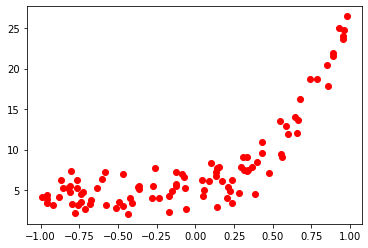

In [7]:
%matplotlib inline

def generate_dataset(n=100, degree=1, noise=1, factors=None):
    # Generates a dataset by adding random noise to a randomly
    # generated polynomial function.
    
    x = np.random.uniform(low=-1, high=1, size=n)
    
    factors = np.random.uniform(0, 10, degree+1)
    
    y = np.zeros(x.shape)
    
    for idx in range(degree+1):
        y += factors[idx] * (x ** idx)

    # add noise
    y += np.random.normal(-noise, noise, n)
    
    return x, y

# load generated data
np.random.seed(0)

X, y = generate_dataset(n=100, degree=4, noise=1.5)

plt.plot(X, y, 'r.', markersize=12)


Implement polynomial regression using the `sklearn.preprocessing.PolynomialFeatures` transformation. Using the `sklearn.grid_search.GridSearchCV` class, perform a grid search of the polynomial order hyperparameter space with cross-validation and report the performance on an independent test set.

Plot a learning curve that show the validation accuracy as a function of the polynomial order. 

<p><font color='#770a0a'>Which models have a high bias, and which models have high variance? Motivate your answer.</font><p>
    
Repeat this experiment, this time using the diabetes dataset instead of the generated data.

[9 8 6 7 4 2 3 1 5]


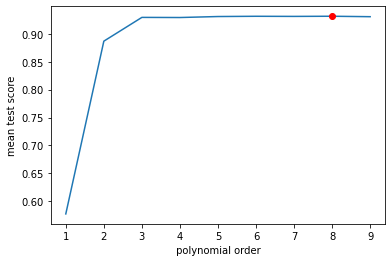

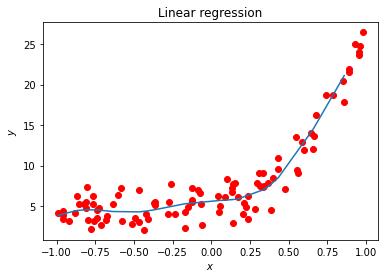

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV


X_column =X[:, np.newaxis]


# split the data into training/testing sets
X_train_gen = X_column[:-20]
X_test_gen = X_column[-20:]

# split the targets into training/testing sets
y_train_gen = y[:-20, np.newaxis]
y_test_gen = y[-20:, np.newaxis]


def polynominal_regression(X_train_data,y_train_data,X_test_data,y_test_data,polynominal_list = []):
    linearregression = linear_model.LinearRegression()
    model = Pipeline([
        ("scaler", scaler),
        ("poly", PolynomialFeatures()),
        ("linear regression",linearregression)
        ])
    
    #     print(model.best_params_)
    clf = GridSearchCV(estimator=model,param_grid = {'poly__degree':polynominal_list},cv=4)
    clf.fit(X_train_data,y_train_data)
    y_predicted = clf.predict(X_test_data)
    return clf, y_predicted


def plot_score(clft):
    fig = plt.figure()
    results = clft.cv_results_['mean_test_score']
    plt.plot(polynominal_list,results)

    plt.plot(polynominal_list[int(np.where(results == np.amax(results))[0])],np.amax(results),'ro')
    plt.xlabel(' polynomial order ')
    plt.ylabel('mean test score')

    print(clft.cv_results_['rank_test_score'])
    
    
polynominal_list = list(range(1,10))
clf,y_predicted = polynominal_regression(X_train_gen,y_train_gen,X_test_gen,y_test_gen,polynominal_list)

plot_score(clf)


fig = plt.figure()
plt.plot(X, y, 'r.', markersize=12)

order = np.argsort(X_test_gen[:,0])
plt.plot(X_test_gen[order], y_predicted[order])
    
# plt.legend(legends_list)
plt.title('Linear regression')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()




$\bf{Answer:}$ <br>
Here, it can be seen that a 8th order polynominal has the highest mean test score, and is ranked as the the number one polynominal. It can however be seen that the mean test score barely increases after 3 orders. This is thus enough to correctly predict the simulated data. A model with a low number of polynominals, has a higher bias but a lower variance. The model with a lower polynomial order doesn't take all the information from the trainingset into account, therefore the model is simplified. Which leads to a larger difference between the prediciton of the model and the true data. These models have a high bias. 

A model with a higher polynomial degree pays more attention to the training data and learns its underlying principles. The model performs well on the trainingsdata, however it performs less on unseen data. The model is too complex to predict well on the test data and introduces a high variability. The variance of these kind of models is larger than a simple model.

[1 2 3 4]


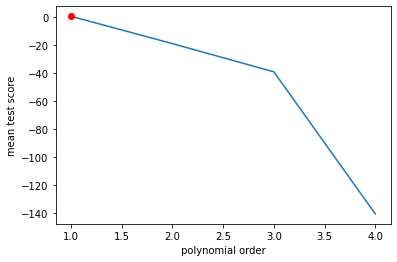

In [9]:
polynominal_list=[1,2,3,4]


clf, y_predicted = polynominal_regression(X_train,y_train,X_test,y_test,polynominal_list)
plot_score(clf)


$\bf{Answer:}$ <br>
For the  diabetes data, it can be seen that the highest score is generated by a linear regression model with only one order of polynominals. The parameters have been tried up to 4, since the number of features will increase rapidly for high values of n. However, the mean test scoe is still low and this would mean that a linear regression model would not be a suitable model for the diabetes data. 

### ROC curve analysis
A common method to evaluate binary classifiers is the receiver operating characteristic (ROC) curve. Similar to the week one practicals, implement a $k$-NN classifier on the breast cancer dataset, however, his time use the $k$-NN pipeline from the preliminary. Train the model for different values of $k$ and evaluate their respective performance with an ROC curve, use the `sklearn.metrics.roc_curve` function.

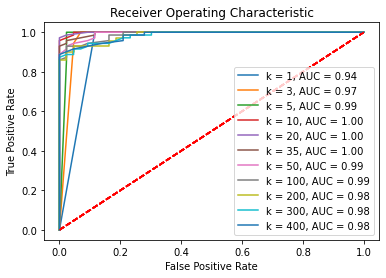

In [39]:
from sklearn.metrics import roc_curve, auc

# Load data
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split in training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create KNN model, looping over list of k-values

k_list = [1,3,5,10,20,35,50,100,200,300,400]

for k in k_list:
    
    # initialize a k-NN classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    # Create the pipeline
    model = Pipeline([
                      ("scaler", scaler),
                      ("knn", knn)
                     ])
    # train the model using the training dataset
    model.fit(X_train, y_train)

    # make predictions using the testing dataset
    prediction = model.predict_proba(X_test)
    # calculate the Receiver Operating Characteristics (True positive rate, false positive rate and treshold)
    fpr, tpr, threshold = roc_curve(y_test, prediction[:,1])

    # calculate area under curve
    roc_auc = auc(fpr, tpr)
    
    # plot the ROC curves
    plt.plot(fpr, tpr, label = 'k = %d, AUC = %0.2f' % (k,roc_auc))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Receiver Operating Characteristic')
    
plt.show()


### $F_1$ score and Dice similarity coefficient

The Dice similarity coefficient is a very popular evaluation measure for image segmentation applications. Assuming that $A$ is the ground truth segmentation of an object represented as a binary image, and $B$ is the binary output of an image segmentation method, the Dice similarity coefficient is computed as:

$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$

where $|\cdot|$ represents the cardinality of the objects (e.g. $|A|$ is the number of non-zero pixels in the ground truth segmentation).

For example, the Dice similarity can be computed in the following way:

0.3402777777777778
0.3402777777777778
0.3402777777777778
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       880
           1       0.34      0.34      0.34       144

    accuracy                           0.81      1024
   macro avg       0.62      0.62      0.62      1024
weighted avg       0.81      0.81      0.81      1024



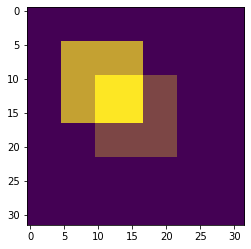

In [136]:
# generate some test objecys
A = np.zeros((32, 32))
A[10:-10, 10:-10] = 1
B = np.zeros((32, 32))
B[5:-15, 5:-15] = 1

dice = 2*np.sum(A*B)/(np.sum(A)+np.sum(B))

# display the results
plt.plot()
plt.imshow(A)
plt.imshow(B,alpha=0.7)

print(dice)

#shown below are multiple ways that show that F1 score is equal to dice coefficient
#1
from sklearn.metrics import confusion_matrix
tn,fp,fn,tp = (0,0,0,0)

A_int = A.astype(int)
B_int = B.astype(int)

A_array = np.reshape(A_int, 32*32) #changes the 32 by 32 matrix into one long array with 32*32 elements
B_array = np.reshape(B_int, 32*32)

tn,fp,fn,tp = confusion_matrix(A_array,B_array).ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1 = 2 * (precision * recall) / (precision + recall)
print(F1)

#2
from sklearn.metrics import f1_score
print(f1_score(A_array,B_array))

#3
from sklearn.metrics import classification_report
print(classification_report(A_array, B_array))

<p><font color='#770a0a'>Show that the $F_1$ score, which is the harmonic mean of precision and recall, is equivalent to the Dice similarity coefficient</font><p>

$\bf{Answer:}$ <br>
We assume that both the Dice coefficient and the F1 Score are applied on boolean data, meaning they can be expressed in true positive(TP), true negative(TN), false positive(FP) and false negative(FN) <br><br>
$\text{Dice}(A,B) = \frac{2|A\cap B|}{|A| + |B|}$ = $\frac{2|A\cap B|}{|A\cup B| + |A\cap B|}$ = $\frac{2*Intersection}{Union + Intersection}$

Knowing that: <br>
$\text{Union} = TP + FN + FP$ <br>
$\text{Intersection} = TP$ <br>

Filling in the formula, gives: <br>
$\text{Dice}(A,B) = \frac{2*TP}{TP+TP+FN+FP}$ = $\frac{2TP}{2TP+FN+FP}$ <br><br>

The formula for the F1 score is given by: <br>
$\text{F1 Score} = 2*\frac{precision*recall}{precision+recall} = \frac{2}{\frac{1}{precision}+\frac{1}{recall}} $ <br>
precision is defined as: <br>
$\text{Precision} = \frac{TP}{(TP+FP)}$ <br>
recall is defined as: <br>
$\text{Recall} = \frac{TP}{(TP+FN)}$ <br>

filling in into the formula gives:<br>
$\text{F1 Score} = \frac{2}{\frac{TP+FP}{TP}+\frac{TP+FN}{TP}} = \frac{2}{\frac{2TP+FP+FN}{TP}} = \frac{2TP}{2TP+FP+FN}$ <br>

As we can see, the Dice formula and the F1 Score are equivalent
